In [1]:
#Import the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib notebook
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import scipy.stats as stats

In [2]:
#Read the csv files
questions_python = pd.read_csv("Resources/Questions.csv", encoding = "iso-8859-1")
answers_python = pd.read_csv("Resources/Answers.csv", encoding = 'iso-8859-1')
tags_python = pd.read_csv("Resources/Tags.csv", encoding = 'iso-8859-1')

In [3]:
#Clean up the Data Frames
#Since we can't fully read the Title or the Body of the text from the DF,
#atually, we don't need the Title and Body of the text
#I just remove them to make the data frames cleaner
#And we will be working with the clean Data Frames from now on

clean_questions_python = questions_python[['Id','OwnerUserId', 'CreationDate',
                                          'Score','Title']]
clean_answers_python = answers_python[['Id','OwnerUserId','ParentId','CreationDate',
                                      'Score', 'Body']]
clean_answers_python.head()

,Id,OwnerUserId,ParentId,CreationDate,Score,Body
0,497,50.0,469,2008-08-02T16:56:53Z,4,<p>open up a terminal (Applications-&gt;Utilit...
1,518,153.0,469,2008-08-02T17:42:28Z,2,<p>I haven't been able to find anything that d...
2,536,161.0,502,2008-08-02T18:49:07Z,9,<p>You can use ImageMagick's convert utility f...
3,538,156.0,535,2008-08-02T18:56:56Z,23,<p>One possibility is Hudson. It's written in...
4,541,157.0,535,2008-08-02T19:06:40Z,20,"<p>We run <a href=""http://buildbot.net/trac"">B..."


In [4]:
#Sort Questions by ID
sort_questions = clean_questions_python.sort_values(ascending=True, by = 'Id')
#Sort Answers by ID
sort_answers = clean_answers_python.sort_values(ascending=True, by = 'Id')
#Sort Tags by ID
sort_tags = tags_python.sort_values(ascending=True, by = 'Id')

In [5]:
#Convert date into numerical value for both Questions and Answers DF
clean_questions_python['CreationDate'] = pd.to_datetime(questions_python['CreationDate'])
clean_answers_python['CreationDate'] = pd.to_datetime(answers_python['CreationDate'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
#Rename the columns' names to make it looks better
sort_python_questions = sort_questions.rename(columns={'CreationDate': "Questions' Creation Date",
                                                     'OwnerUserId': "Owner's User Id"})
sort_python_answers = sort_answers.rename(columns={'CreationDate': "Answers' Creation Date",
                                                     'OwnerUserId': "Owner's User Id"})
sort_python_questions.head()

,Id,Owner's User Id,Questions' Creation Date,Score,Title
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...


In [7]:
#Merge answers and questions and tags into a single DF

merge_questions_answers = sort_python_answers.merge(sort_python_questions, left_on = 'ParentId', right_on = 'Id', suffixes = ['(Answers)' , '(Questions)'])
merge_all = sort_tags.join(merge_questions_answers)
#questions_python.dtypes

In [8]:
descending_ans_scores = merge_all.sort_values(ascending = False, by = 'Score(Answers)')
descending_ans_scores.head()

,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Body,Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title
5846,396856,python-3.x,231855.0,9951.0,231767.0,2008-10-23T22:48:44Z,8384.0,"<p>To understand what <code>yield</code> does,...",231767.0,18300.0,2008-10-23T22:21:11Z,5524.0,"What does the ""yield"" keyword do?"
2239,183042,sqlalchemy,6581949.0,9951.0,100003.0,2011-07-05T11:29:50Z,4510.0,<h1>Classes as objects</h1>\n\n<p>Before under...,100003.0,9951.0,2008-09-19T06:10:46Z,3219.0,What is a metaclass in Python?
20243,1086758,python,1594484.0,9951.0,739654.0,2009-10-20T13:05:46Z,3332.0,"<p>If you are not into long explanations, see ...",739654.0,1897.0,2009-04-11T07:05:31Z,1920.0,How to make a chain of function decorators in ...
10395,639078,regex,394814.0,5190.0,394809.0,2008-12-27T08:44:19Z,3110.0,"<p>Yes, it was <a href=""https://mail.python.or...",394809.0,51518.0,2008-12-27T08:32:18Z,2655.0,Does Python have a ternary conditional operator?
14151,818016,reddit,522578.0,19082.0,522563.0,2009-02-06T22:52:36Z,2666.0,"<p>Using an additional state variable, such as...",522563.0,51816.0,2009-02-06T22:47:54Z,1512.0,Accessing the index in Python 'for' loops


In [9]:
#Convert Questions' and Answers' Dates to numeric values to calculate
merge_all["Questions' Creation Date"] = pd.to_datetime(merge_all["Questions' Creation Date"])
merge_all["Answers' Creation Date"] = pd.to_datetime(merge_all["Answers' Creation Date"])
#merge.dtypes

#Create a new column called 'Time it takes'
merge_all['Time it takes'] = merge_all["Answers' Creation Date"] - merge_all["Questions' Creation Date"]
sort_merge = merge_all.sort_values(ascending=True, by = 'Time it takes')
sort_merge.head(3)

,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Body,Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title,Time it takes
266569,9334762,xml,10955711.0,279627.0,33054229.0,2012-06-08 20:33:54,39.0,<p>Add a space after the <code>4</code>:</p>\n...,33054229.0,1090079.0,2015-10-10 12:55:24,43.0,Accessing attributes on literals work on all t...,-1219 days +07:38:30
266570,9334762,lxml,10955713.0,14343.0,33054229.0,2012-06-08 20:34:00,84.0,<p>You need parens:</p>\n\n<pre><code>(4).__st...,33054229.0,1090079.0,2015-10-10 12:55:24,43.0,Accessing attributes on literals work on all t...,-1219 days +07:38:36
266571,9334779,python,10955754.0,1358283.0,33054229.0,2012-06-08 20:38:16,7.0,<p>actually (to increase unreadability...):</p...,33054229.0,1090079.0,2015-10-10 12:55:24,43.0,Accessing attributes on literals work on all t...,-1219 days +07:42:52


In [10]:
#Convert column 'Time it takes' to numerical values (in term of hours)
sort_merge["Time it takes"] =  sort_merge['Time it takes'] / np.timedelta64(1, 'D')

#Quick note: after the conversion, the column 'Time it takes' will now be of type
#float64 instead of timedelta64 so if you try to run this cell again, it will
#give you an error, this is normal. Run cell 18 again and the problem is solved.

#Extract the cells with negative 'Time it takes'
sort_merge = sort_merge.loc[sort_merge['Time it takes'] > 0]
sort_merge.head(3)

,Id,Tag,Id(Answers),Owner's User Id(Answers),ParentId,Answers' Creation Date,Score(Answers),Body,Id(Questions),Owner's User Id(Questions),Questions' Creation Date,Score(Questions),Title,Time it takes
274051,9559646,list,11276096.0,382374.0,11276095.0,2012-06-30 17:24:27,0.0,"<p>Solved this with <a href=""https://bugzilla....",11276095.0,382374.0,2012-06-30 17:24:26,0.0,Django MemoryError while Using Python Imaging ...,0.000012
269184,9413002,python,11066852.0,1175266.0,11066850.0,2012-06-16 20:38:01,5.0,<p>The problem is that the Sphinx theme that C...,11066850.0,1175266.0,2012-06-16 20:38:00,2.0,"Error message ""no theme named 'sphinx-theme-ok...",0.000012
272554,9517829,django,11210301.0,1258041.0,11210300.0,2012-06-26 15:04:56,17.0,<p>This happens because <code>zip</code> evalu...,11210300.0,1258041.0,2012-06-26 15:04:55,10.0,Why does zip() drop the values of my generator?,0.000012


In [11]:
questions_df = sort_merge[['Tag', 'Score(Questions)', 'Score(Answers)']]
questions_df = questions_df.sort_values(ascending=True, by = 'Score(Answers)')
cut_df = questions_df.loc[(questions_df['Score(Questions)'] > 0 ) & (questions_df['Score(Questions)'] <= 2000)]
cut_df['Tag'].count()

613228

Text(0.5,1,"Overall Population's Questions and Answers Scatter Plot")

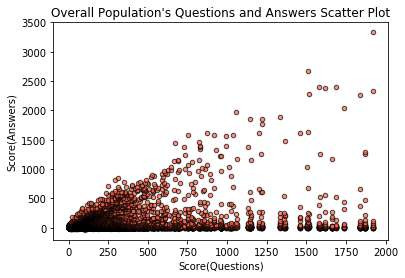

In [12]:
#Scatter plot gives us an overview of the correlation between questions' and answers' scores
cut_df.plot.scatter(x = 'Score(Questions)',y= 'Score(Answers)',
                           marker="o", color="tomato",
                           alpha = 0.7, stacked = False, edgecolors = 'black')
plt.title("Overall Population's Questions and Answers Scatter Plot")

In [23]:
descending_qs_scores = sort_merge.sort_values(ascending = False, by = 'Score(Questions)')
clean_des_qs_scores = descending_qs_scores[['Tag','ParentId','Score(Answers)','Score(Questions)','Title','Time it takes']]
#Extract out the most upvoted answer per question
most_upvotes_ans = clean_des_qs_scores
most_upvotes_ans['Max Answer Scores'] = most_upvotes_ans.groupby(most_upvotes_ans['ParentId'])['Score(Answers)'].transform(max)
most_upvotes_ans['Max Answer Scores'].count()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


985715

Text(0.5,1,'Most Upvoted Answer Per Qs')

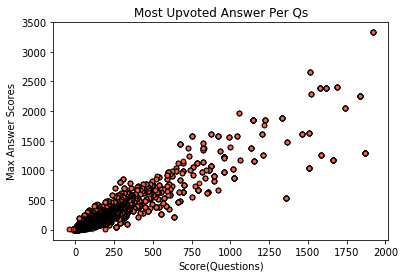

In [14]:
#Perform a scatter plot on this
bounded_scatter = most_upvotes_ans.loc[most_upvotes_ans['Score(Questions)'] <= 2000]
bounded_scatter.plot.scatter(x = 'Score(Questions)',y= 'Max Answer Scores',
                          marker="o", color="tomato",
                          alpha = 0.7, stacked = False, edgecolors = 'black')
plt.title("Most Upvoted Answer Per Qs")

In [35]:
#Perform a regression for most upvoted.
regress_most_upvotes_ans = most_upvotes_ans.rename(columns = {'Score(Questions)': "score_questions",
                                               'Score(Answers)': 'score_answers', 'Max Answer Scores': 'max_answers_score'})
#Run a regression for most upvoted.
regression_model =  ols("max_answers_score ~ score_questions", data=regress_most_upvotes_ans).fit()
regression_model_summary = regression_model.summary()
regression_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      max_answers_score   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.169e+07
Date:                Sat, 22 Dec 2018   Prob (F-statistic):               0.00
Time:                        08:43:42   Log-Likelihood:            -4.4803e+06
No. Observations:              985715   AIC:                         8.961e+06
Df Residuals:                  985713   BIC:                         8.961e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1429      0.023     49.469      0.000       1.098       1.188
score_questions     1.2318      0.000   3418.539      0.000       1.231       1.232
==============================================================================
Omnibus:                   539180.395   Durbin-Watson:                   0.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      90975312685.860
Skew:                          -0.125   Prob(JB):                         0.00
Kurtosis:                    1491.304   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

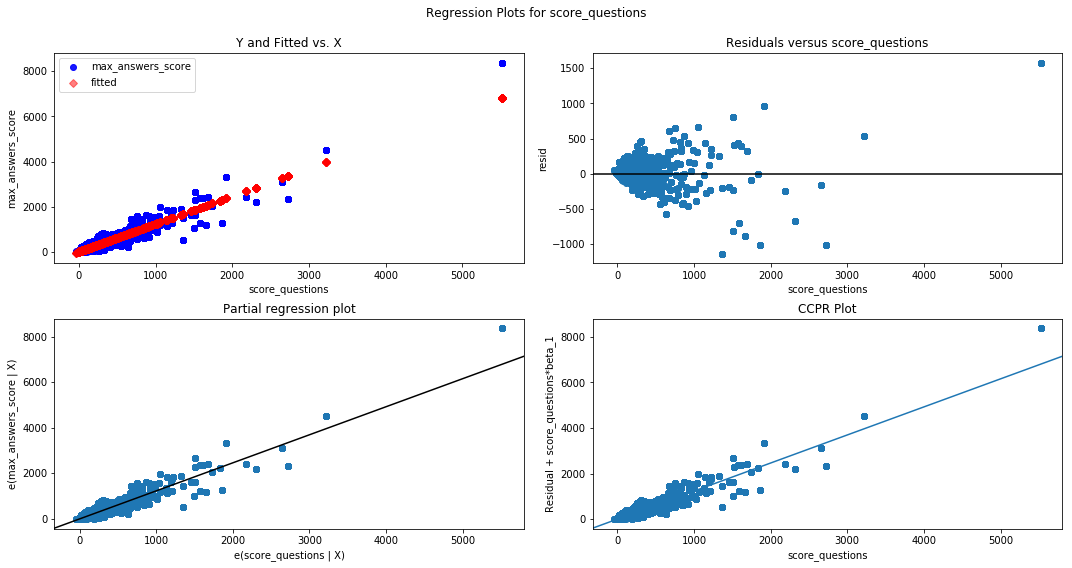

In [16]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(regression_model, "score_questions", fig=fig)

In [56]:
#Generate a random sample to perform tests on. The Data Frame we'll be using is the average Questions' and Answers' Scores
#per tag.
sample_df = most_upvotes_ans.sample(n = 788572)
sample_df.head()

,Tag,ParentId,Score(Answers),Score(Questions),Title,Time it takes,Max Answer Scores
367096,csv,15606847.0,0.0,0.0,queryset to dict with common fields as keys,0.020220,1.0
539082,extract,23093844.0,0.0,0.0,Replace Python List/Set implementation with cu...,0.002975,0.0
416764,wxpython,17846934.0,6.0,0.0,how to define same variable for two values usi...,0.003484,6.0
760191,python,32028169.0,1.0,0.0,Utility to manage multiple python scripts,0.499954,1.0
148478,locale,5501572.0,1.0,3.0,python's lxml and iterparse method,0.004583,4.0


Text(0.5,1,'Sample Vs Population Scatter Plot')

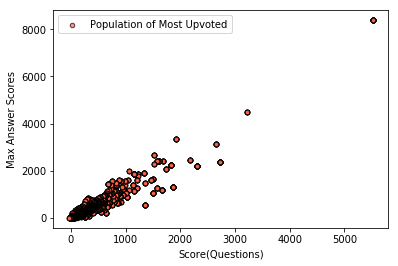

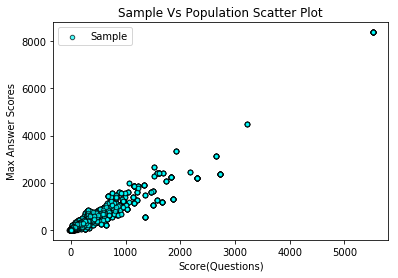

In [58]:
#Scatter plot of the generated sample in comparision to the population.
ax = most_upvotes_ans.plot.scatter(x = 'Score(Questions)',y= 'Max Answer Scores', label = 'Population of Most Upvoted',
                          marker="o", color="tomato",
                          alpha = 0.7, stacked = False, edgecolors = 'black')
sample_df.plot.scatter(x = 'Score(Questions)',y= 'Max Answer Scores', label = 'Sample',
                          marker="o", color="cyan",
                          alpha = 0.7, stacked = False, edgecolors = 'black')
plt.title("Sample Vs Population Scatter Plot")
#plt.ylim([0,3500])
#plt.xlim([0, 2000])


In [47]:
#Perform a regression for random Sample 
regress_sample = sample_df.rename(columns = {'Score(Questions)': "score_questions",
                                               'Score(Answers)': 'score_answers', 'Max Answer Scores': 'max_answers_scores'})
#Run a regression
regression_model =  ols("max_answers_scores ~ score_questions", data=regress_sample).fit()
regression_model_summary = regression_model.summary()
regression_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     max_answers_scores   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 9.371e+06
Date:                Sat, 22 Dec 2018   Prob (F-statistic):               0.00
Time:                        08:45:48   Log-Likelihood:            -3.5782e+06
No. Observations:              788572   AIC:                         7.156e+06
Df Residuals:                  788570   BIC:                         7.156e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1374      0.026     44.371      0.000       1.087       1.188
score_questions     1.2332      0.000   3061.142      0.000       1.232       1.234
==============================================================================
Omnibus:                   432077.517   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      73346079981.098
Skew:                          -0.143   Prob(JB):                         0.00
Kurtosis:                    1497.078   Cond. No.                         64.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

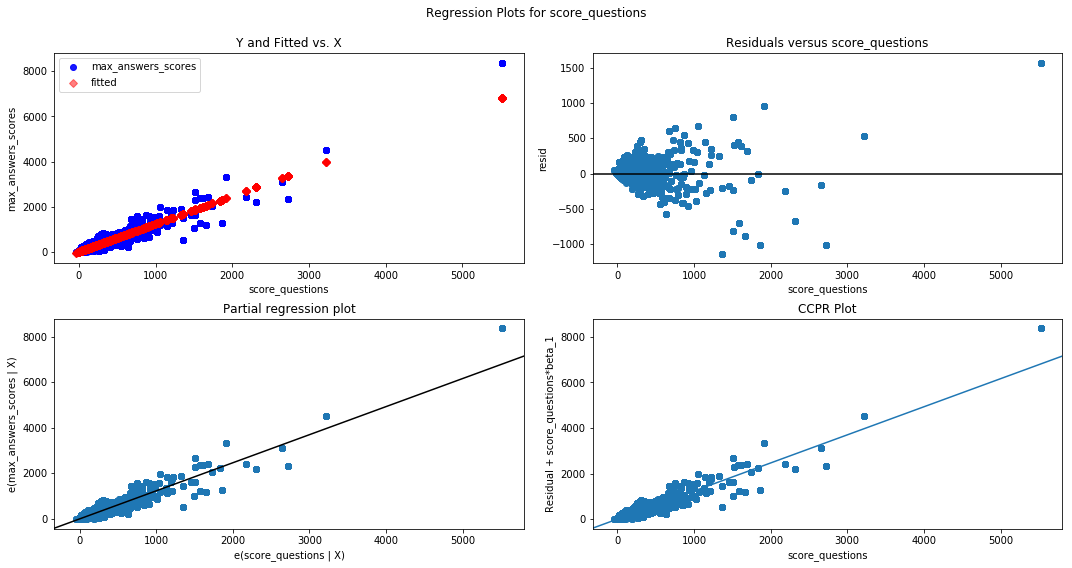

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(regression_model, "score_questions", fig=fig)

In [61]:
#Perform a Chi-Squared Test for independence to determine whether there is a significant relationship between two categorical
#variables.In this case, we're testing between Questions and Answers Scores.
###Hypothesis: Higher Question Scores are associated with higher Answers Scores.
###Null Hypothesis: Questions Scores has no impact on Answers Scores.
###From the OLS Regression Results, we have the following equation for EXPECTED ANSWERS SCORES:
###Expected Answers Scores = 0.2514 + (1.3787)(Questions Scores) + (0.008)

expected_answers_scores_per_qs = sample_df
expected_answers_scores_per_qs['Min Answer Scores'] = 1.1374 + (1.2332 * expected_answers_scores_per_qs['Score(Questions)'])
expected_answers_scores_per_qs = expected_answers_scores_per_qs.rename(columns = {'Min Answer Scores': 'Expected Answers Scores'})

expected_answers_scores_per_qs = expected_answers_scores_per_qs.rename(columns = {'Max Answer Scores': 'Observed Answers Scores'})

expected_answers_scores_per_qs = expected_answers_scores_per_qs[['Tag', 'ParentId', 'Observed Answers Scores', 'Expected Answers Scores']]
expected_answers_scores_per_qs.head()


,Tag,ParentId,Observed Answers Scores,Expected Answers Scores
367096,csv,15606847.0,1.0,1.1374
539082,extract,23093844.0,0.0,1.1374
416764,wxpython,17846934.0,6.0,1.1374
760191,python,32028169.0,1.0,1.1374
148478,locale,5501572.0,4.0,4.8370


In [59]:
#Perform the Chi_Squared Test:

Chi_Squared_Test_df = expected_answers_scores_per_qs[['Expected Answers Scores', 'Observed Answers Scores']]

# The degree of freedom is: Sample size - 1 = 788572 - 1 = 788571
# With a p-value of 0.95, the confidence level is 1.00-0.5 = 0.95.

critical_value = stats.chi2.ppf(q = 0.95, df = 788571)
print(f"The Critical Value Is : {critical_value}")

The Critical Value Is : 790637.8145526093


In [52]:
# Run the chi square test with stats.chisquare()
stats.chisquare(Chi_Squared_Test_df['Observed Answers Scores'], Chi_Squared_Test_df['Expected Answers Scores'])

Power_divergenceResult(statistic=829500.4486779846, pvalue=1.3155783709011302e-225)

In [46]:
most_downvotes_ans = clean_des_qs_scores
most_downvotes_ans['Min Answer Scores'] = most_upvotes_ans.groupby(most_upvotes_ans['ParentId'])['Score(Answers)'].transform(min)
#most_downvotes_ans = most_downvotes_ans.drop_duplicates('Min Answer Scores')
most_downvotes_ans.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Tag,ParentId,Score(Answers),Score(Questions),Title,Time it takes,Max Answer Scores,Min Answer Scores
5860,lnk,231767.0,64.0,5524.0,"What does the ""yield"" keyword do?",1929.171111,8384.0,1.0
5857,directory,231767.0,34.0,5524.0,"What does the ""yield"" keyword do?",1694.760972,8384.0,1.0
5870,maya,231767.0,27.0,5524.0,"What does the ""yield"" keyword do?",2709.625382,8384.0,1.0
5869,wxwidgets,231767.0,14.0,5524.0,"What does the ""yield"" keyword do?",2709.305012,8384.0,1.0
5849,python,231767.0,121.0,5524.0,"What does the ""yield"" keyword do?",0.432604,8384.0,1.0


<IPython.core.display.Javascript object>


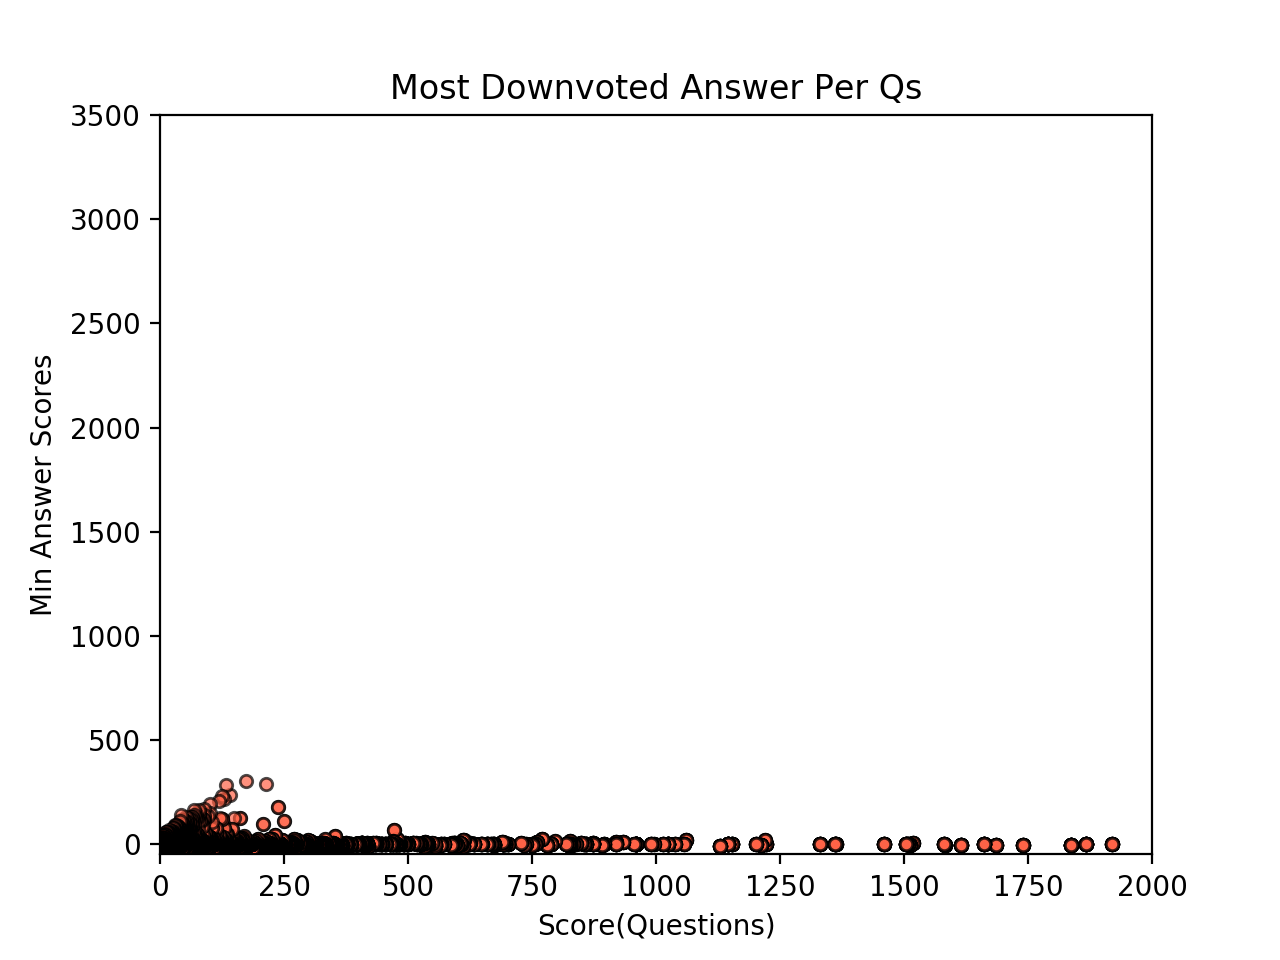

(0, 2000)

In [47]:
#Perform a scatter plot on this
bounded_scatter = most_downvotes_ans.loc[most_downvotes_ans['Score(Questions)'] <= 2000]
bounded_scatter.plot.scatter(x = 'Score(Questions)',y= 'Min Answer Scores',
                          marker="o", color="tomato",
                          alpha = 0.7, stacked = False, edgecolors = 'black')
plt.title("Most Downvoted Answer Per Qs")
plt.ylim([-50,3500])
plt.xlim([0,2000])

In [48]:
#Perform a regression for most downvoted.
regress_most_downvotes_ans = most_downvotes_ans.rename(columns = {'Score(Questions)': "score_questions",
                                               'Score(Answers)': 'score_answers', 'Min Answer Scores': 'min_answers_score'})
#Run a regression for most downvoted.
regression_model =  ols("min_answers_score ~ score_questions", data=regress_most_downvotes_ans).fit()
regression_model_summary = regression_model.summary()
regression_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      min_answers_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     34.04
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           5.41e-09
Time:                        18:12:06   Log-Likelihood:            -2.3611e+06
No. Observations:              985715   AIC:                         4.722e+06
Df Residuals:                  985713   BIC:                         4.722e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9001      0.003    334.441      0.000       0.895       0.905
score_questions    -0.0002    4.2e-05     -5.834      0.000      -0.000      -0.000
==============================================================================
Omnibus:                  2199319.469   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      52169347888.517
Skew:                          20.346   Prob(JB):                         0.00
Kurtosis:                    1129.301   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""